minimize function


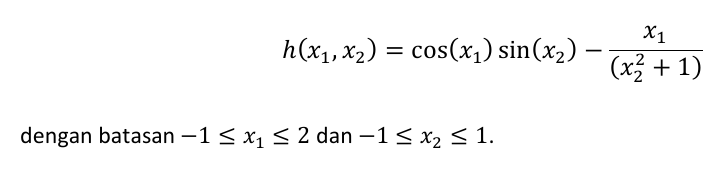

In [41]:
import numpy as np
np.random.seed(69)

## Define simulated annealing helper function

In [42]:
#our function (to minimize)
def f(x1, x2): #ngitung score
  from numpy import sin, cos
  return -cos(x1)*sin(x2)-(x1/(x2**2 + 1))

#function to calculate probability of new state for being choosen to current state
def get_acc_proba(deltaE, T):
  return np.exp(-deltaE/T)

#function to generate random x1 and x2
def generate_random_state():
  x1 = np.random.uniform(-1, 2)
  x2 = np.random.uniform(-1, 1)
  return x1, x2

## Main program

In [43]:
#DEFINE CONSTANT VARIABLE
T = 10000000 #starting temperature
T_FINAL = 1e-6 #algorithm will stop if reach this temperature
COOLING_RATE = 0.99 #cooling rate
MAX_ITER = np.Infinity #maximum iteration

#generate current state
x1_current, x2_current =  generate_random_state()
score_current = f(x1_current, x2_current)

i = 0 

#save best so far solution
x1_best, x2_best = x1_current, x2_current 
score_best = score_current


#initialize variables to save state history (for visualization & observation)
#OPTIONAL
score_history = []
temp_history = []
proba_history = []
random_history = []
best_history = []

#repeat until MAX_ITER or until reach certain temperature
while i < MAX_ITER and T > T_FINAL :
  #generate new state
  x1_new, x2_new =  generate_random_state()
  score_new = f(x1_new, x2_new)

  deltaE = score_new - score_current

  # if deltaE < 0, keep new state as current state and save to best so far solution 
  if deltaE < 0:
    x1_current, x2_current = x1_new, x2_new
    score_current = score_new

    #we found local minima best, lets compare with our best so far solution
    if score_current < score_best :
      #if better than best so far solution, then replace our best solution
      x1_best, x2_best = x1_current, x2_current 
      score_best = score_current
      
    #==========================
    proba_history.append(0)
    random_history.append(1)
    #==========================
  else:
    #else, apply new state to curent state with this probability
    acc_proba = get_acc_proba(deltaE, T)
    random_number = np.random.rand()
    if random_number < acc_proba:
      #replace current state
      x1_current, x2_current = x1_new, x2_new
      score_current = score_new
    
    #==========================
    proba_history.append(acc_proba)
    random_history.append(random_number)
    #==========================

  i+=1
  T*=COOLING_RATE #T = T * COOLING_RATE
  
  #save history
  score_history.append(score_new)
  temp_history.append(T)
  best_history.append(score_best)

In [44]:
#best solution is
print(x1_best, x2_best)
print(score_best)

1.9953842349045656 -0.04053738412004315
-2.0088052525827864


# visualize result

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

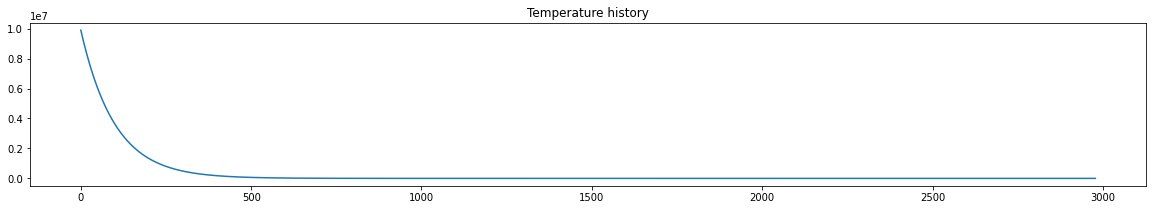

In [46]:
plt.plot(range(len(temp_history)), temp_history)
plt.title('Temperature history')
plt.show()

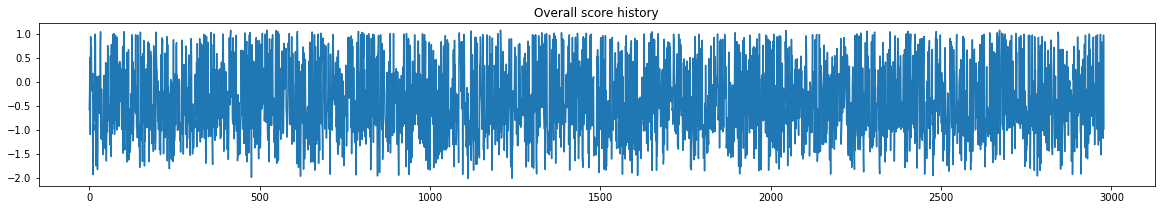

In [47]:
plt.plot(range(len(score_history)), score_history)
plt.title('Overall score history')
plt.show()

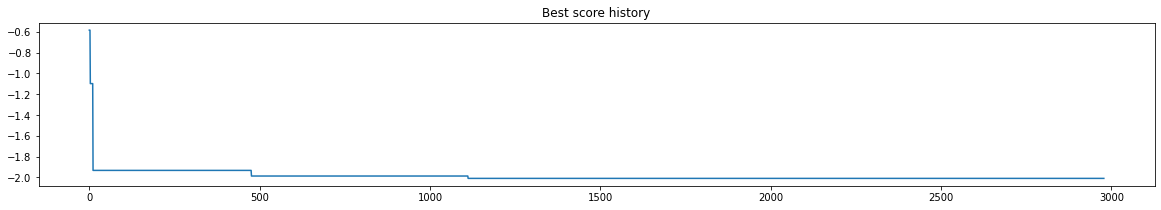

In [48]:
plt.plot(range(len(best_history)), best_history)
plt.title('Best score history')
plt.show()

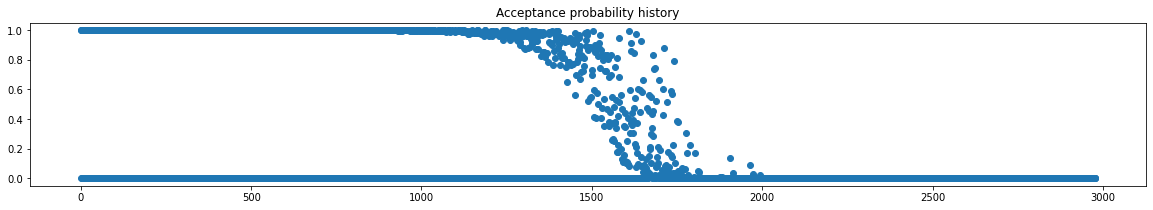

In [49]:
plt.scatter(range(len(proba_history)), proba_history)
plt.title('Acceptance probability history')
plt.show()

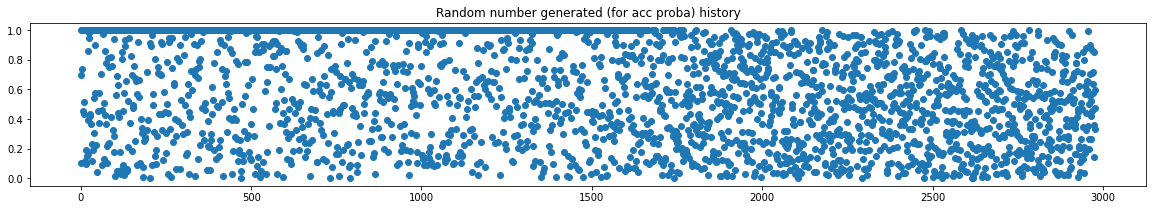

In [50]:
plt.scatter(range(len(random_history)), random_history)
plt.title('Random number generated (for acc proba) history')
plt.show()